# Mervar - Backpropagation
## 2.16.2022

**1. Submit a copy of your python code.**

In [1]:
import numpy as np

def nonlin(x, deriv=False):
    if (deriv==True):
        return x*(1-x)
    else:
        return 1/(1+np.exp(-x))

# input dataset as a matrix for the XOR problem
x = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]])

# output dataset as a matrix for the XOR problem
y = np.array([[0], [1], [1], [0]])

np.random.seed(1)

# synapse matrices
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

# training step
for i in range(60000):

    l0 = x
    l1 = nonlin(np.dot(l0, syn0))
    l2 = nonlin(np.dot(l1, syn1))

    l2_error = y - l2

    if(i % 10000) == 0:
        print("Error: " + str(np.mean(np.abs(l2_error))))

    l2_delta = l2_error*nonlin(l2, deriv=True)

    l1_error = l2_delta.dot(syn1.T)

    l1_delta = l1_error * nonlin(l1,deriv=True)

    # update synapse weights
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

print("Output after training:")
print(l2)

Error: 0.49641003190272537
Error: 0.008584525653247153
Error: 0.005789459862507809
Error: 0.004629176776769984
Error: 0.003958765280273649
Error: 0.003510122567861676
Output after training:
[[0.00260572]
 [0.99672209]
 [0.99701711]
 [0.00386759]]


**2. Present each of the four XOR inputs as a single epoch, and run 10,000 epochs. Set the learning rate at 1. Use 2 hidden units. Show a semilog plot of the sum squared error (SSE) on the output node.**

Error: 0.4996610419039931


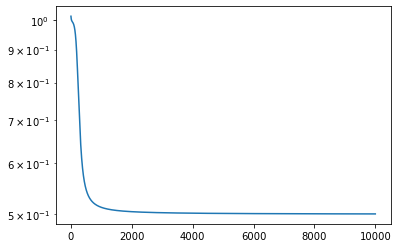

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def nonlin(x, deriv=False):
    if (deriv==True):
        return x*(1-x)
    else:
        return 1/(1+np.exp(-x))

# input dataset as a matrix for the XOR problem
x = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]])

# output dataset as a matrix for the XOR problem
y = np.array([[0], [1], [1], [0]])

np.random.seed(1)

# synapse matrices
syn0 = 2*np.random.random((3,2)) - 1
syn1 = 2*np.random.random((2,1)) - 1

# create an empty numpy array
squaredError = []

# training step
for i in range(10000):

    l0 = x
    l1 = nonlin(np.dot(l0, syn0))
    l2 = nonlin(np.dot(l1, syn1))

    l2_error = y - l2

    # Added value to squaredError
    squaredError.append(sum(l2_error**2))

    if(i % 10000) == 0:
        print("Error: " + str(np.mean(np.abs(l2_error))))

    l2_delta = l2_error*nonlin(l2, deriv=True)

    l1_error = l2_delta.dot(syn1.T)

    l1_delta = l1_error * nonlin(l1,deriv=True)

    # update synapse weights
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

plt.semilogy(squaredError)
plt.show()


**3. Change the number of hidden units to 20. Rerun the code and compare the semilog plot of SSE now to the plot earlier. What differences do you notice?  Was the added computational expense of more hidden units worth it in terms of performance?**

Error: 0.507412570412686


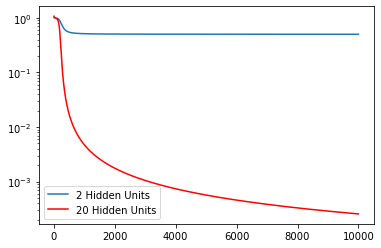

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def nonlin(x, deriv=False):
    if (deriv==True):
        return x*(1-x)
    else:
        return 1/(1+np.exp(-x))

# input dataset as a matrix for the XOR problem
x = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]])

# output dataset as a matrix for the XOR problem
y = np.array([[0], [1], [1], [0]])

np.random.seed(1)

# synapse matrices
syn0 = 2*np.random.random((3,20)) - 1
syn1 = 2*np.random.random((20,1)) - 1

# create an empty numpy array
squaredError2 = []

# training step
for i in range(10000):

    l0 = x
    l1 = nonlin(np.dot(l0, syn0))
    l2 = nonlin(np.dot(l1, syn1))

    l2_error = y - l2

    # Added value to squaredError2
    squaredError2.append(sum(l2_error**2))

    if(i % 10000) == 0:
        print("Error: " + str(np.mean(np.abs(l2_error))))

    l2_delta = l2_error*nonlin(l2, deriv=True)

    l1_error = l2_delta.dot(syn1.T)

    l1_delta = l1_error * nonlin(l1,deriv=True)

    # update synapse weights
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

plt.semilogy(squaredError)
plt.semilogy(squaredError2, color='red')
plt.legend(['2 Hidden Units', '20 Hidden Units'])
plt.show()


When adding 18 hidden units, the error drastically decreases and efficiency is GREATLY improved. The error reaches an almost infitesimal amount with the additional units and the computational time difference is barely noticeable. Personally, it took 0.1 seconds extra with the additional 18 hidden units. I definitely think that in this case, the additional uniots are worth it but, that does not necessary mean that the size of your layers and the number of layers in your neural network determines the usefulness of the network. More != Better.